**Table of contents**<a id='toc0_'></a>    
- 1. [Setup](#toc1_)    
- 2. [Find IRF](#toc2_)    
- 3. [Figures](#toc3_)    
  - 3.1. [Sensitivity analysis wrt number of adjustment year](#toc3_1_)    
    - 3.1.1. [Effect on government](#toc3_1_1_)    
    - 3.1.2. [Effect on production firms](#toc3_1_2_)    
    - 3.1.3. [Effect on Phillips-curve](#toc3_1_3_)    
    - 3.1.4. [Effect on households](#toc3_1_4_)    
    - 3.1.5. [Effect on bequest and savings](#toc3_1_5_)    
    - 3.1.6. [Long term](#toc3_1_6_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# Government spending shock - further comments

In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np

import matplotlib.pyplot as plt   
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

from BabyMAKROModel import BabyMAKROModelClass

## 1. <a id='toc1_'></a>[Setup](#toc0_)

In [2]:
model = BabyMAKROModelClass(name='baseline')

**Unpack namespaces:**

In [3]:
par = model.par
ss = model.ss
sol = model.sol

**Define sensitivity parameter and values:**

In [4]:
parameter = 'epsilon_B'                                         # set parameter 
parvalues = [0.05,0.15,0.5]                                     # set parameter values
models = model.multi_model(parameter,parvalues)                 # create one model for each value

model compiled, 37.8 secs
Jacobian calculated in 2.0 secs
model compiled, 0.0 secs
Jacobian calculated in 2.0 secs
model compiled, 0.0 secs
Jacobian calculated in 2.0 secs


## 2. <a id='toc2_'></a>[Find IRF](#toc0_)

**Define shock:**

In [5]:
Tshock = 50                                                    # length of shock
persistence = np.array([0.80**np.arange(Tshock)])              # persistence of shock       
persistence = persistence.reshape((50,1)) 

**Find IRF:**

In [13]:
for model_ in models:

    model_.set_exo_ss()                                         
    model_.set_unknowns_ss()                                             
    model_.sol.G[:Tshock,:] = model_.ss.G*(1+0.01*persistence)    # shock to government spending
    model_.find_IRF()                                           

initial:
t1-t0 = 0.03637 secs
it = 4
    max. abs. error = 3.07e-12
    1.36e-13 in A_R_ini_error
    3.17e-15 in Aq_diff
    6.22e-15 in FOC_capital_agency
    1.04e-12 in FOC_K_ell
    3.07e-12 in mkt_clearing
    3.69e-13 in PC

solve: t1-t0 = 0.05536 secs
evaluate + update: t3-t2 = 0.05408 secs
initial:
t1-t0 = 0.03300 secs
it = 4
    max. abs. error = 2.52e-12
    7.59e-14 in A_R_ini_error
    8.29e-15 in Aq_diff
    4.88e-15 in FOC_capital_agency
    1.84e-12 in FOC_K_ell
    2.52e-12 in mkt_clearing
    1.53e-13 in PC

solve: t1-t0 = 0.05594 secs
evaluate + update: t3-t2 = 0.05701 secs
initial:
t1-t0 = 0.03500 secs
it = 4
    max. abs. error = 5.84e-12
    2.19e-13 in A_R_ini_error
    7.87e-15 in Aq_diff
    5.33e-15 in FOC_capital_agency
    4.61e-12 in FOC_K_ell
    5.84e-12 in mkt_clearing
    6.18e-13 in PC

solve: t1-t0 = 0.05453 secs
evaluate + update: t3-t2 = 0.05600 secs


## 3. <a id='toc3_'></a>[Figures](#toc0_)

### 3.1. <a id='toc3_1_'></a>[Sensitivity analysis wrt number of adjustment year](#toc0_)

#### 3.1.1. <a id='toc3_1_1_'></a>[Effect on government](#toc0_)

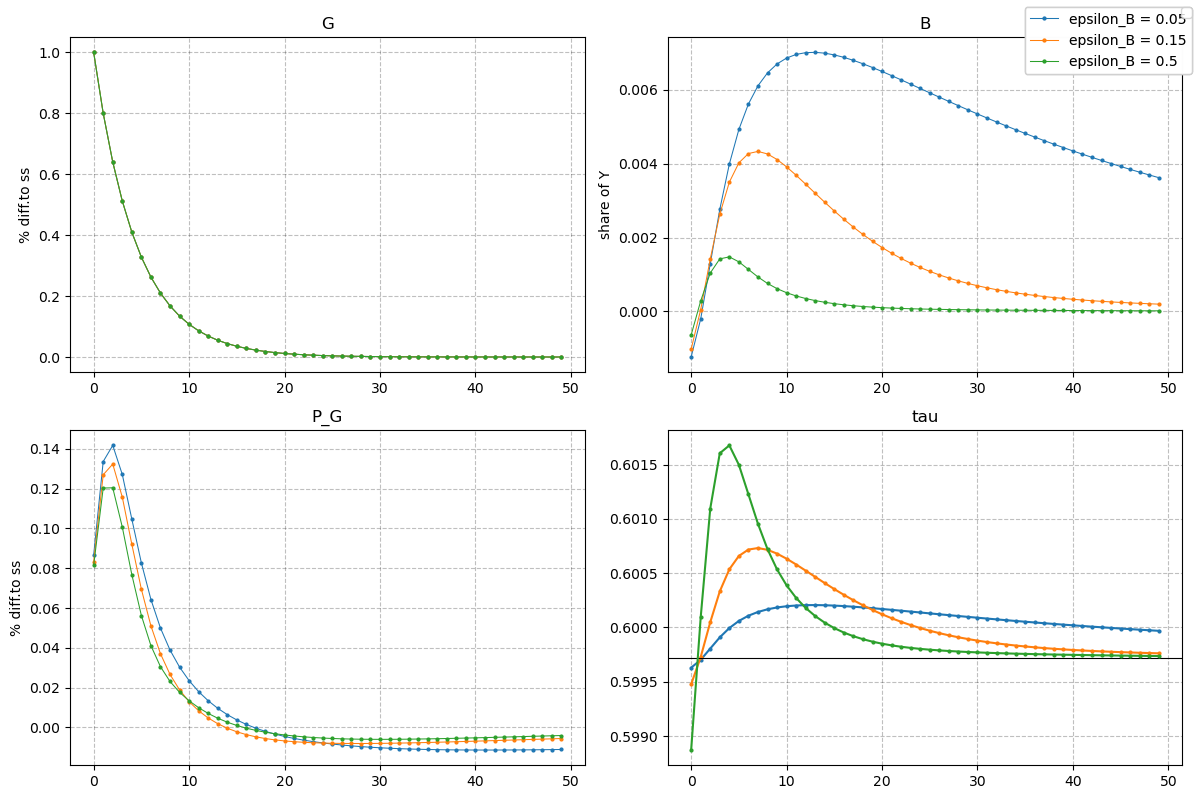

In [14]:
model.plot_IRF_models(models,parameter,varlist=['G','B','P_G','tau'],abs=['tau'],Y_share=['B'],ncol=2)

#### 3.1.2. <a id='toc3_1_2_'></a>[Effect on production firms](#toc0_)

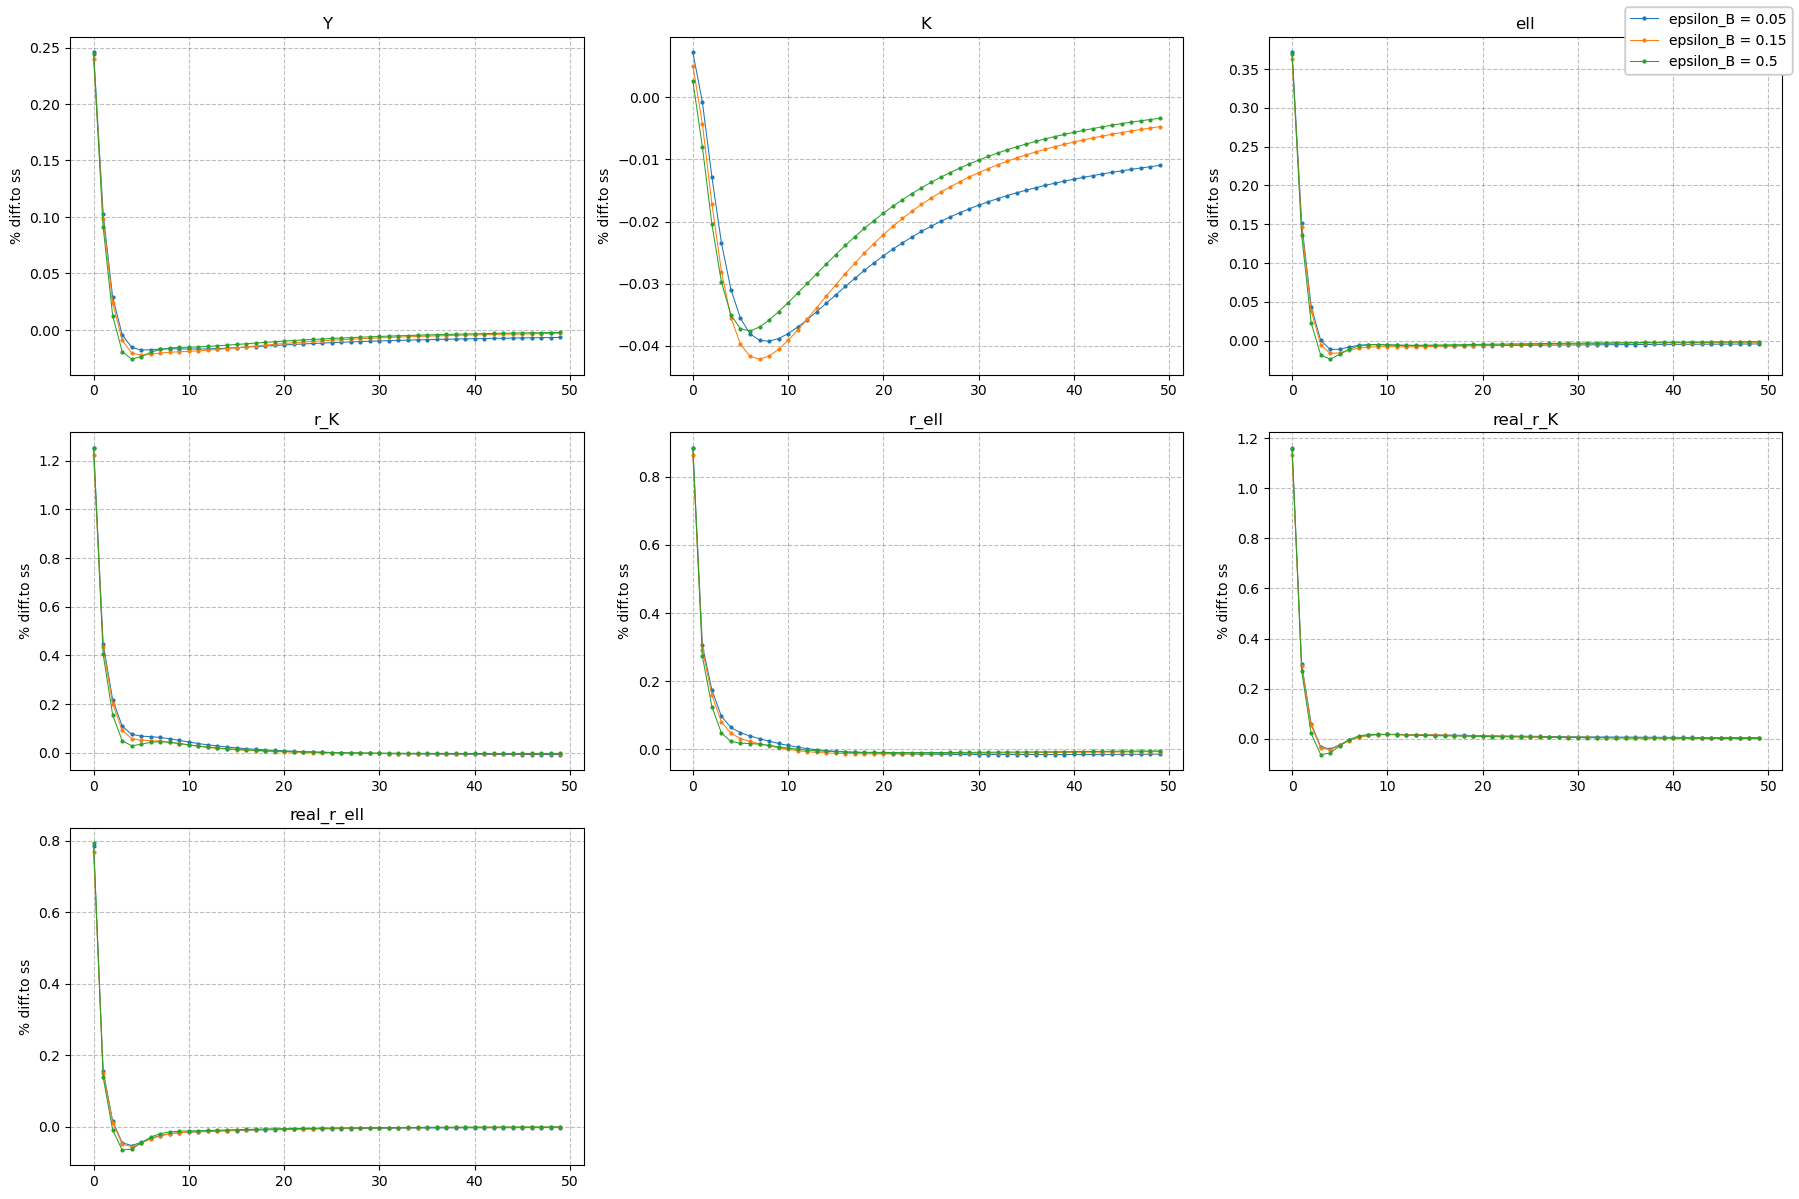

In [15]:
model.plot_IRF_models(models,parameter,varlist=['Y','K','ell','r_K','r_ell','real_r_K','real_r_ell'])

#### 3.1.3. <a id='toc3_1_3_'></a>[Effect on Phillips-curve](#toc0_)

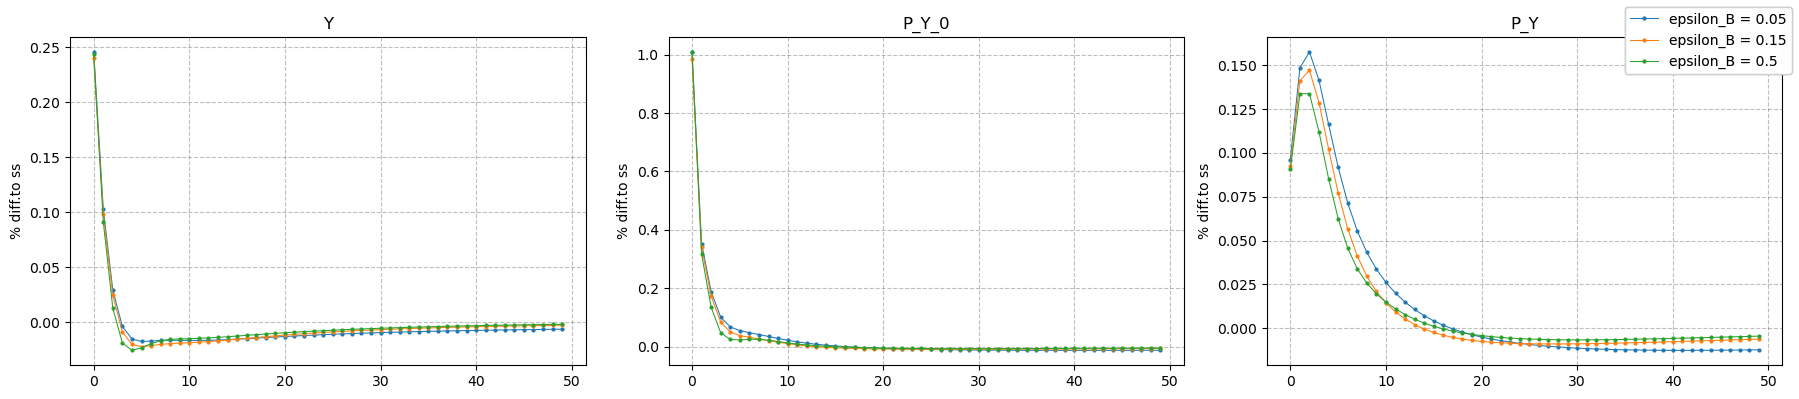

In [16]:
model.plot_IRF_models(models,parameter,varlist=['Y','P_Y_0','P_Y'])

#### 3.1.4. <a id='toc3_1_4_'></a>[Effect on households](#toc0_)

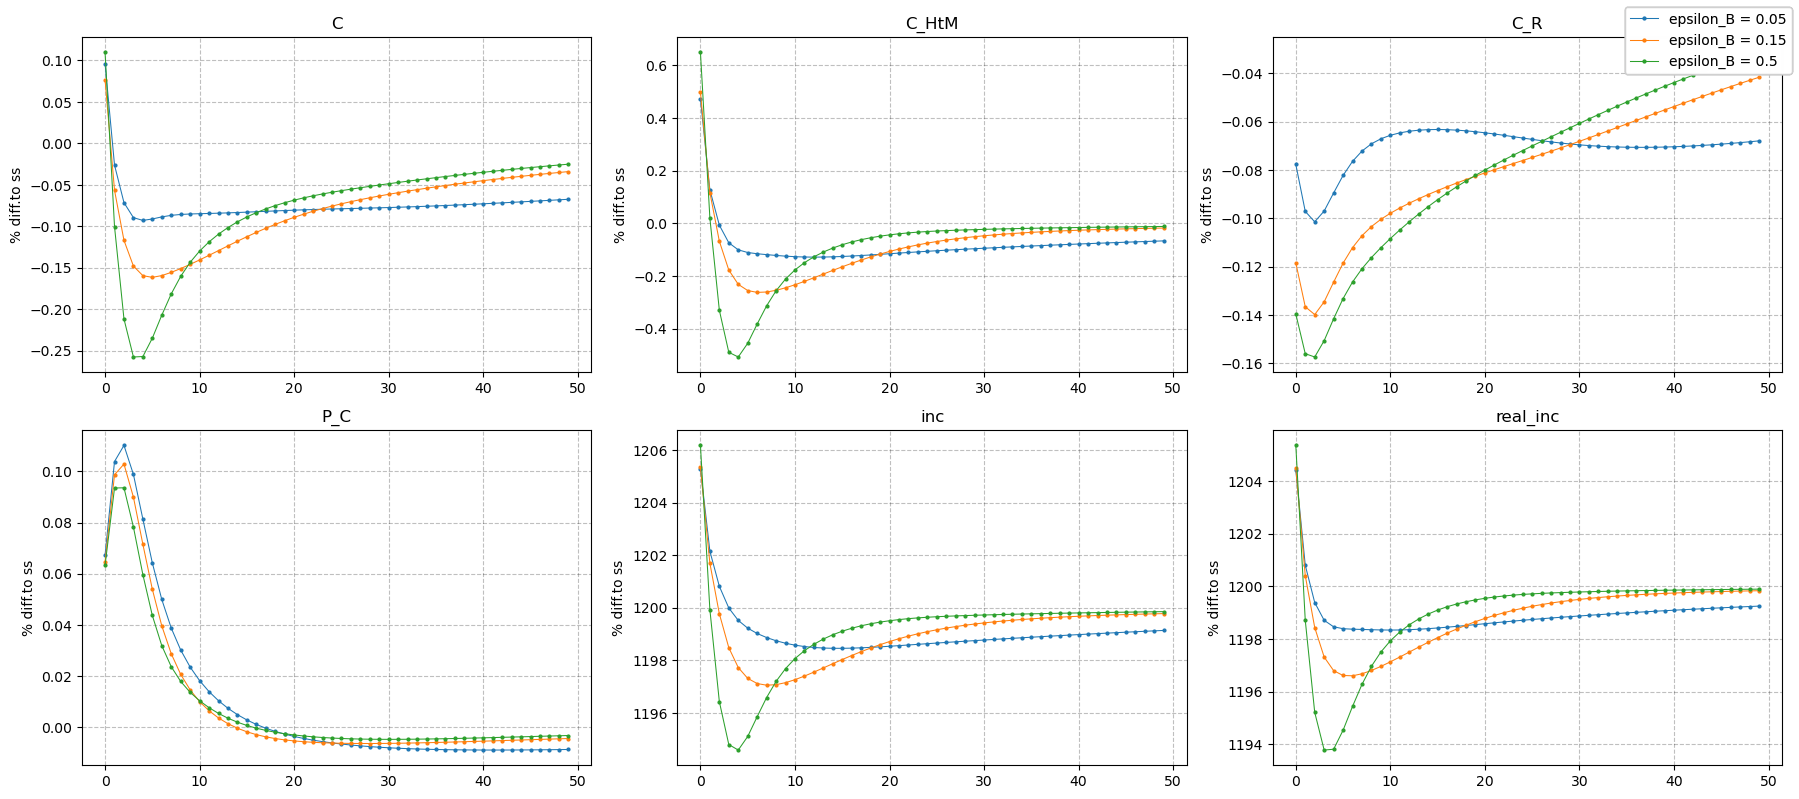

In [17]:
model.plot_IRF_models(models,parameter,varlist=['C','C_HtM','C_R','P_C','inc','real_inc'])

#### 3.1.5. <a id='toc3_1_5_'></a>[Effect on bequest and savings](#toc0_)

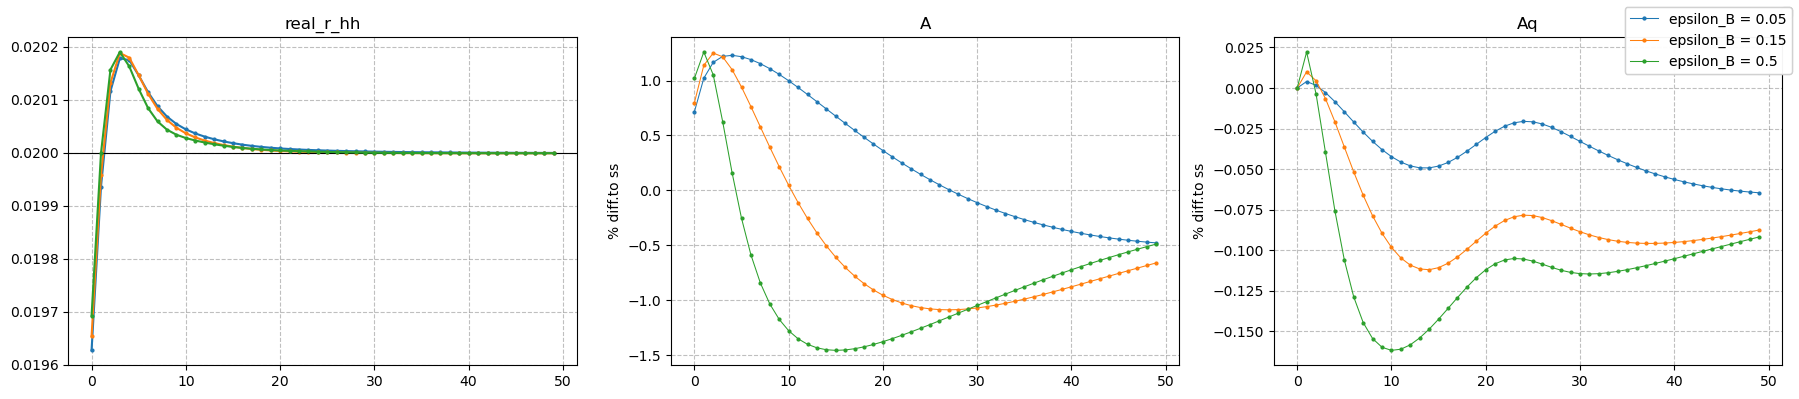

In [18]:
model.plot_IRF_models(models,parameter,varlist=['real_r_hh','A','Aq'],ncol=3,abs=['real_r_hh'])

#### 3.1.6. <a id='toc3_1_6_'></a>[Long term](#toc0_)

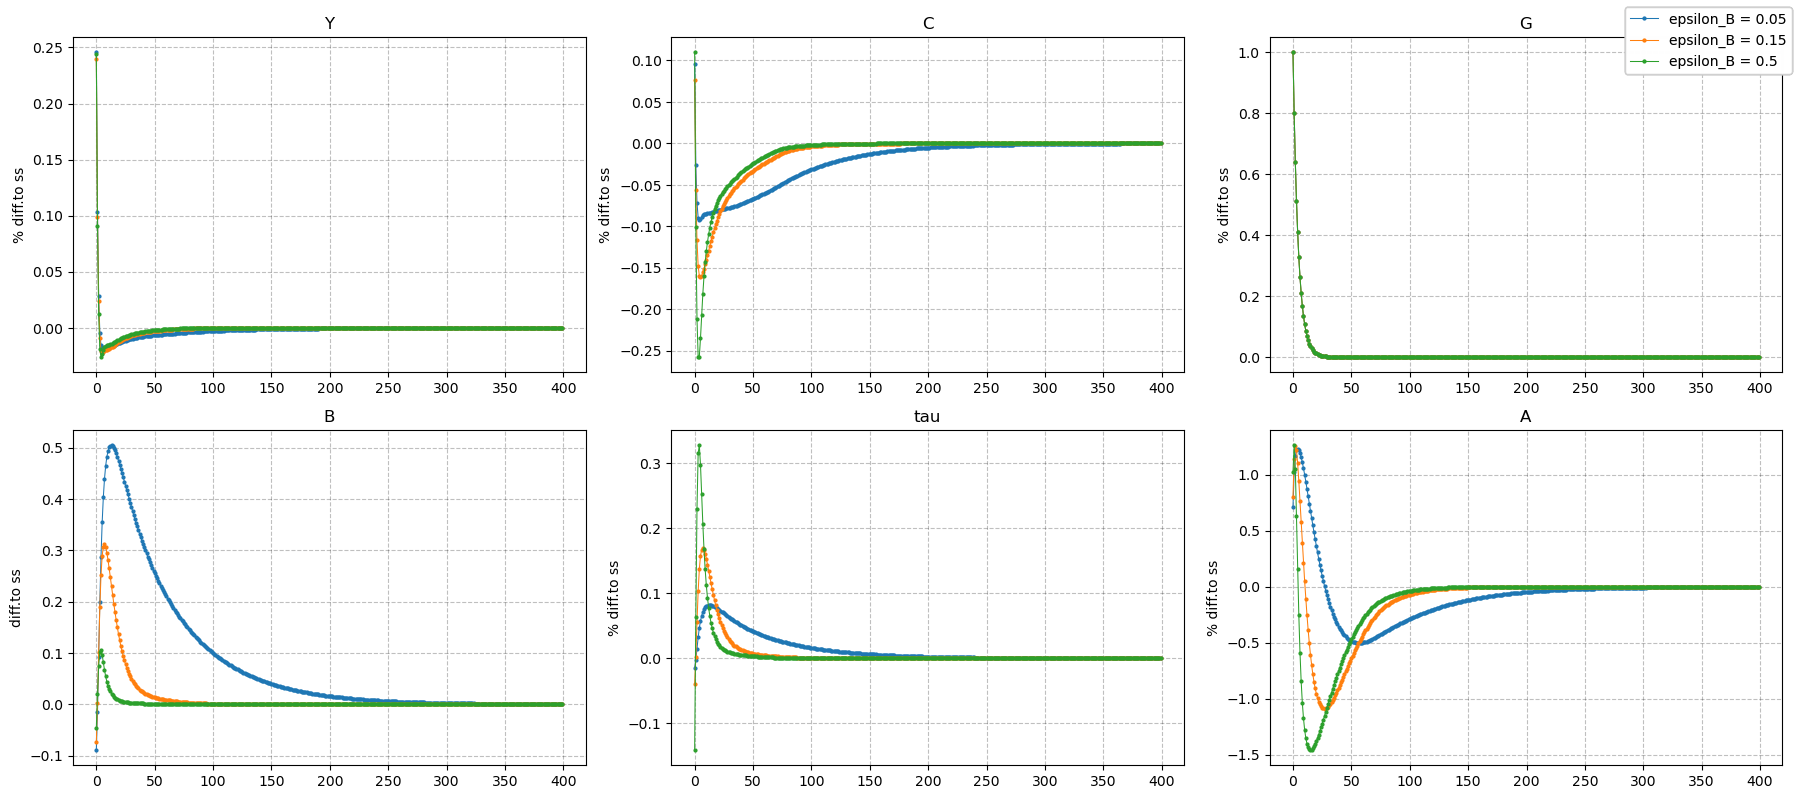

In [19]:
model.plot_IRF_models(models,parameter,varlist=['Y','C','G','B','tau','A'], T_IRF=par.T)